In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt


df_original = pd.read_csv('events.csv', low_memory=False)

Text(0.5,1,'Cantidad de entradas al sitio por tipo de dispositivo')

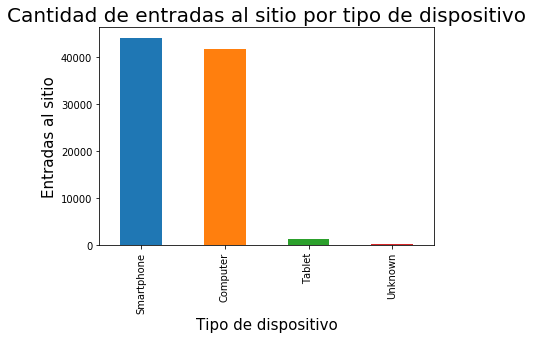

In [2]:
df_visited = df_original.loc[df_original['event']=='visited site',:]
df_visited['device_type'].value_counts().plot.bar()
plt.xlabel('Tipo de dispositivo', fontsize=15)
plt.ylabel('Entradas al sitio', fontsize=15)
plt.title('Cantidad de entradas al sitio por tipo de dispositivo', fontsize=20)

In [3]:
entradas_por_chrome_mobile = df_visited.loc[(df_visited['browser_version'].str.contains('Chrome Mobile')) & (df_visited['device_type']=='Smartphone'),:]
entradas_por_chrome_mobile.size

851644

In [4]:
entradas_por_safari = df_visited.loc[(df_visited['browser_version'].str.contains('Mobile Safari')) & (df_visited['device_type']=='Smartphone'),:]
entradas_por_safari.size

69759

In [5]:
entradas_por_otro_navegador = df_visited.loc[df_visited['device_type']=='Smartphone',:].size
entradas_por_otro_navegador -= (entradas_por_safari.size + entradas_por_chrome_mobile.size)

Text(0.5,1,'Entradas al sitio por dispositivos móviles separadas por navegador')

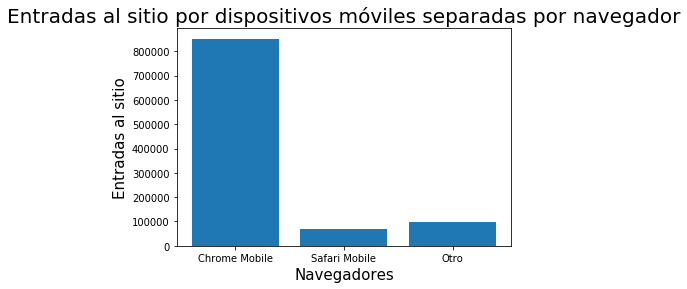

In [6]:
plt.bar(height=[entradas_por_chrome_mobile.size, entradas_por_safari.size, entradas_por_otro_navegador], x=['Chrome Mobile', 'Safari Mobile', 'Otro'])
plt.xlabel('Navegadores', fontsize=15)
plt.ylabel('Entradas al sitio', fontsize=15)
plt.title('Entradas al sitio por dispositivos móviles separadas por navegador', fontsize=20)

In [7]:
mobile_entrys_df = df_visited.loc[df_visited['device_type']=='Smartphone',:]


android_users = mobile_entrys_df.loc[mobile_entrys_df['operating_system_version'].str.contains('Android'),:]
ios_users = mobile_entrys_df.loc[mobile_entrys_df['operating_system_version'].str.contains('iOS'),:]
display(android_users.size)
display(ios_users.size)

929476

75969

In [8]:
other_so = df_visited.loc[df_visited['device_type']=='Smartphone',:].size
display(other_so)
other_so -= (android_users.size + ios_users.size)
display(other_so)

1017497

12052

Text(0.5,1,'Entradas al sitio por dispositivos móviles separadas por sistema operativos')

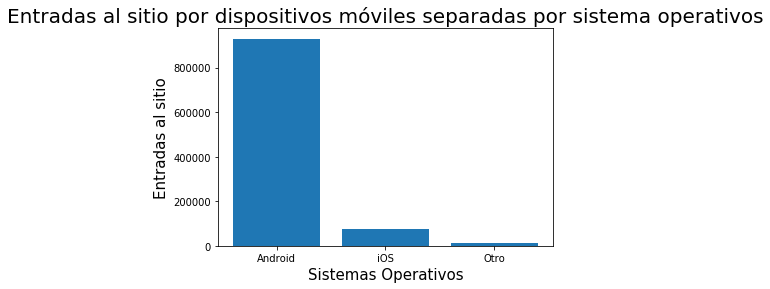

In [9]:
plt.bar(height=[android_users.size, ios_users.size, other_so], x=['Android', 'iOS', 'Otro'])
plt.xlabel('Sistemas Operativos', fontsize=15)
plt.ylabel('Entradas al sitio', fontsize=15)
plt.title('Entradas al sitio por dispositivos móviles separadas por sistema operativos', fontsize=20)

In [10]:
grouped = df_visited.groupby(['new_vs_returning', 'device_type']).agg({'person':'count'})
grouped

person
new_vs_returning device_type        
New              Computer      12073
                 Smartphone    14305
                 Tablet          478
                 Unknown          42
Returning        Computer      29717
                 Smartphone    29934
                 Tablet          756
                 Unknown          73

In [11]:
df_visited = df_visited.dropna(how='all', axis=1)
df_visited

,timestamp,event,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,visited site,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,visited site,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,visited site,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,visited site,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,visited site,00184bf9,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0
87,2018-05-04 18:47:03,visited site,00184bf9,Direct,Returning,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 66.0
96,2018-05-17 00:08:56,visited site,0019c395,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0
106,2018-06-06 18:40:53,visited site,001bb7eb,Organic,New,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52
108,2018-06-08 12:15:33,visited site,001bb7eb,Paid,Returning,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52
112,2018-05-29 12:56:08,visited site,001f1653,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x570,Android 6,Chrome Mobile 39


In [12]:
grouped = df_visited.groupby(['channel', 'device_type']).agg({'person':'count'})
grouped.columns = ['amount']
grouped

amount
channel  device_type        
Direct   Computer      10602
         Smartphone     7754
         Tablet          141
         Unknown          25
Email    Computer         27
         Smartphone       49
Organic  Computer       5842
         Smartphone     6349
         Tablet          142
         Unknown          15
Paid     Computer      20827
         Smartphone    22581
         Tablet          739
         Unknown          46
Referral Computer       4232
         Smartphone     6928
         Tablet          195
         Unknown          29
Social   Computer        251
         Smartphone      578
         Tablet           17
Unknown  Computer          9